In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers, models
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [ ]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
)

In [ ]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary',

)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150,150 , 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),


    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )


In [ ]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 36, 36, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       4,735,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,882,561 (18.63 MB)

 Trainable params: 4,882,561 (18.63 MB)

 Non-trainable params: 0 (0.00 B)

"I used test data instead of validation data because the number of validation samples is only 16, which is very small, and as a result, the model achieves low accuracy. Therefore, I used test data as validation data to improve the model's performance."

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,

)

Epoch 1/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 661s 16s/step - accuracy: 0.7487 - loss: 0.6048 - val_accuracy: 0.7869 - val_loss: 0.4797
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 674s 16s/step - accuracy: 0.9217 - loss: 0.1980 - val_accuracy: 0.7788 - val_loss: 0.6469
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 656s 16s/step - accuracy: 0.9551 - loss: 0.1237 - val_accuracy: 0.8125 - val_loss: 0.5154
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 658s 16s/step - accuracy: 0.9604 - loss: 0.1035 - val_accuracy: 0.7420 - val_loss: 1.0720
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 671s 16s/step - accuracy: 0.9701 - loss: 0.0814 - val_accuracy: 0.7628 - val_loss: 1.0706
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 648s 16s/step - accuracy: 0.9781 - loss: 0.0626 - val_accuracy: 0.7484 - val_loss: 1.1772
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 649s 16s/step - accuracy: 0.9837 - loss: 0.0462 - val_accuracy: 0.7756 - val_loss: 1.0925
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 650s 16s/step - accuracy: 0.9841 - loss: 0.0477 - val_accuracy: 0.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.7138 - loss: 1.5304
Test Loss: 1.5130000114440918
Test Accuracy: 0.716796875


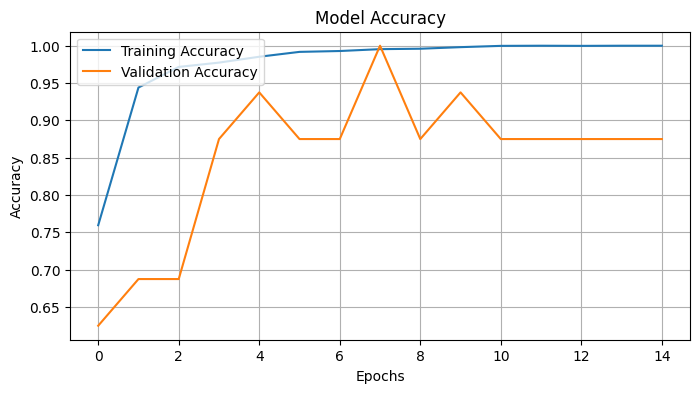

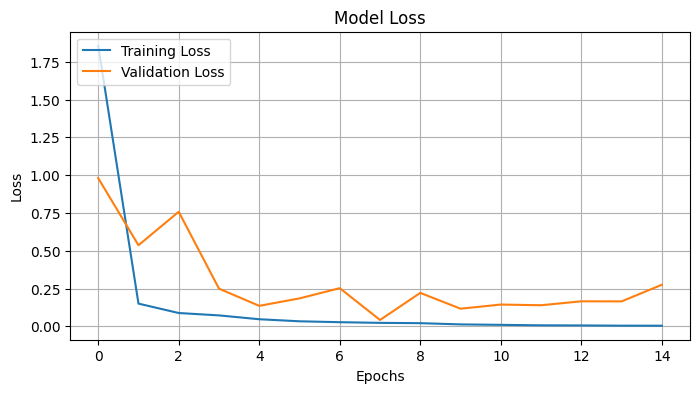

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

NORMAL_images = os.path.join(test_dir, "NORMAL")
PNEUMONIA_images = os.path.join(test_dir, "PNEUMONIA")
category = [NORMAL_images , PNEUMONIA_images]
test_size = 20

for i in range(test_size):
    random_catg = random.choice(category)

    test_image = os.path.join(random_catg, random.choice(os.listdir(random_catg)))
    img = image.load_img(test_image, target_size=(224, 224))

    img_array= image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = model.predict(img_array)

    label = "PNEUMONIA" if prediction[0] > 0.5 else "NORMAL"
    print(f"label = {label}")
    if label in str(random_catg):
        predict_result = "correct"
    else:
        predict_result = "wrong"

    plt.imshow(img)
    plt.title(f"Prediction: {label} ({prediction}) \nreal image = {test_image.split('/')[-2:]} images \nresult={predict_result}")
    plt.axis('off')
    plt.show()

